# Training Logistic Regression and Gaussian Naive Bayes

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    roc_curve, 
    roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

SAVE_FIG = True # set to true to save figures as PNGs



## Data Processing

In [2]:
raw_data = pd.read_csv('./data/clipped_data.csv')
y = raw_data['not_skipped']
raw_data.drop(['not_skipped', 'Unnamed: 0'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(raw_data, y, test_size = 0.25, random_state= 2022)
X_train

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
76422,4.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,...,4,0.712556,-0.155284,0.135781,0.100487,-0.247824,-0.119555,0.205062,-0.106868,0.181833
95708,5.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,10.0,...,4,0.458095,-0.218142,0.171672,0.286516,-0.277489,-0.675640,0.305247,0.094001,0.684365
99497,3.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,...,4,0.079479,0.010505,0.095943,-0.013381,-0.214783,-0.426722,0.189385,0.060339,0.751097
76833,3.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,...,4,0.605342,-0.464312,0.282020,0.540822,0.570378,0.430034,-0.055478,0.859406,-0.146506
8316,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,20.0,...,4,0.376591,-0.596441,0.414059,0.224975,-0.159051,-0.227074,0.049221,-0.479210,-0.018310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133138,8.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,...,4,0.767231,-0.479632,0.147795,0.312882,0.611407,0.665170,-0.131748,0.584243,-0.031937
103024,3.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,12.0,...,4,0.176873,-0.764719,0.265677,0.198811,0.072622,-0.279638,-0.002315,-0.452050,0.194908
147629,8.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,...,4,0.341744,-0.899932,0.328876,0.252109,0.133214,-0.286828,-0.000055,-0.491611,0.145450
1244,8.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,...,4,0.519903,-1.026891,0.338776,0.267942,0.183636,-0.371425,-0.068312,-0.598395,0.138009


## Logistic Regression

In [3]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

/Users/noah/Desktop/Machine Learning/final project/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_hat = logit.predict(X_test)
y_proba = logit.predict_proba(X_test)[:, 1]

In [8]:
acc = accuracy_score(y_test, y_hat)
prec = precision_score(y_test, y_hat)
rec = recall_score(y_test, y_hat)
f = f1_score(y_test, y_hat)

template = "Accuracy: {:.5f} Precision: {:.5f} Recall: {:.5f} F1: {:.5f}"
print(template.format(acc, prec, rec, f))

Accuracy: 0.74934 Precision: 0.69221 Recall: 0.42119 F1: 0.52372


In [9]:
confusion_matrix(y_test, y_hat)

array([[25329,  2538],
       [ 7844,  5708]])

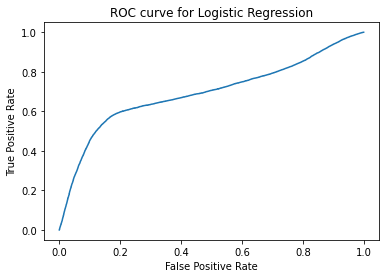

In [13]:
fpr, tpr, tresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Logistic Regression")
if SAVE_FIG: plt.savefig("Logit_roc.png")

In [14]:
roc_auc_score(y_test, y_proba)

0.693507328133817

## GNB

In [15]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [16]:
y_hat_gnb = gnb.predict(X_test)
y_proba_gnb = gnb.predict_proba(X_test)[:, 1]

In [17]:
acc = accuracy_score(y_test, y_hat_gnb)
prec = precision_score(y_test, y_hat_gnb)
rec = recall_score(y_test, y_hat_gnb)
f = f1_score(y_test, y_hat_gnb)

template = "Accuracy: {:.5f} Precision: {:.5f} Recall: {:.5f} F1: {:.5f}"
print(template.format(acc, prec, rec, f))

Accuracy: 0.68121 Precision: 0.50983 Recall: 0.66595 F1: 0.57753


In [18]:
confusion_matrix(y_test, y_hat_gnb)

array([[19190,  8677],
       [ 4527,  9025]])

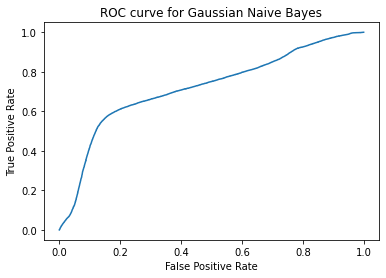

In [23]:
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_proba_gnb)
plt.plot(fpr_gnb, tpr_gnb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Gaussian Naive Bayes")
if SAVE_FIG: plt.savefig("GNB_roc.png")

In [20]:
roc_auc_score(y_test, y_proba_gnb)

0.7190764539388033

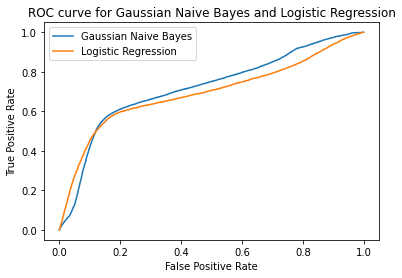

In [26]:
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Gaussian Naive Bayes and Logistic Regression")
if SAVE_FIG: plt.savefig("combined_roc.png")